This is capston project for my udacity ML nanodegree project

You can find the data information from [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) and more detailed from [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt). The data contains 23 nominal, 23 ordinal, 14 discrete, 20 continuous variables and one target variable. 

In [194]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [195]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [196]:
# check the dimension
print(train.shape)

(1460, 81)


In [197]:
test = pd.read_csv('test.csv')
print(test.shape)

(1459, 80)


In [198]:
data = pd.concat([train.iloc[:,0:-1], test], axis=0,ignore_index=True)
data.shape

(2919, 80)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [200]:
# check the statistical summary of numerical data
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Dealing with Missing Values

In [201]:
# check the missing values in each feature
s = data.apply(lambda x: sum(x.isnull()), axis=0)
miss = s[s>0]

In [202]:
miss_less_4 = s[(s<=4)&(s>0)]
miss_less_4

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [203]:
idx_del = []

for idx in data.index:
    if data.iloc[idx][miss_less_4.index].isnull().any():
        idx_del.append(idx)
        
idx_del  

[1379, 1555, 1915, 1945, 2120, 2151, 2188, 2216, 2250, 2473, 2489, 2576, 2904]

### There are 16 features contain missing values in less than 4 observations. These missing values spread in 13 observations and 12 of them are from testing dataset. Eight of them (BasmtFinSF1, BssmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea) are numerical variables

In [204]:
data.iloc[idx_del,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1555,1556,50,RL,72.0,10632,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NaN,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal
1915,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
1945,1946,20,RL,NaN,31220,Pave,NaN,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal
2120,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
2151,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2188,2189,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
2216,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2250,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2473,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,C

In [205]:
miss_more_4 = s[(s>4)]
miss_more_4

LotFrontage      486
Alley           2721
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
dtype: int64

### There are 18 featuress have more than 4 observations have missing values. Three of them (LotFrontage, MasVnrArea, and GarageYrBlt) are continuous variables.

### Check unique values for each categorical feature

In [206]:
categorical_cols = []
for col, col_data in train.iteritems():
    if col_data.dtype == object:
        categorical_cols.append(col) 
        
for col in miss.index:
    if col in categorical_cols:
        print col, data[col].unique()

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Alley [nan 'Grvl' 'Pave']
Utilities ['AllPub' 'NoSeWa' nan]
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone' 'Other'
 'CBlock' nan]
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
KitchenQual ['Gd' 'TA' 'Ex' 'Fa' nan]
Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish

### Impute missing value in categorical variable as 'unknown'

In [207]:
for col, col_data in data.iteritems():
    if col in categorical_cols and col in miss.index:
    #if col in ['MSZoning']:
        col_data = col_data.fillna('unknown', inplace=True)

In [208]:
data.iloc[idx_del,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1379,1380,80,RL,73.0,9735,Pave,unknown,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,unknown,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,unknown,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,unknown,unknown,unknown,0,5,2008,WD,Normal
1555,1556,50,RL,72.0,10632,Pave,unknown,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,unknown,6,Mod,0,unknown,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,unknown,unknown,unknown,0,1,2010,COD,Normal
1915,1916,30,unknown,109.0,21780,Grvl,unknown,Reg,Lvl,unknown,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,unknown,unknown,unknown,unknown,0.0,unknown,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,unknown,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,unknown,unknown,unknown,0,3,2009,ConLD,Normal
1945,1946,20,RL,NaN,31220,Pave,unknown,IR1,Bnk,unknown,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,unknown,unknown,Shed,750,5,2008,WD,Normal
2120,2121,20,RM,99.0,5940,Pave,unknown,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,unknown,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,unknown,MnPrv,unknown,0,4,2008,ConLD,Abnorml
2151,2152,30,RL,85.0,19550,Pave,unknown,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,unknown,unknown,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,unknown,NaN,unknown,0.0,0.0,unknown,unknown,Y,0,39,0,0,0,0,unknown,unknown,unknown,0,1,2008,WD,Normal
2188,2189,20,RL,123.0,47007,Pave,unknown,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,unknown,unknown,unknown,unknown,0.0,unknown,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,unknown,unknown,unknown,0,7,2008,WD,Normal
2216,2217,20,unknown,80.0,14584,Pave,unknown,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,unknown,unknown,unknown,unknown,0.0,unknown,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,unknown,0,unknown,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,unknown,unknown,unknown,0,2,2008,WD,Abnorml
2250,2251,70,unknown,NaN,56600,Pave,unknown,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1

In [209]:
idx_del = []

for idx in data.index:
    if data.iloc[idx][miss_less_4.index].isnull().any():
        idx_del.append(idx)
        
idx_del  

[2120, 2188, 2576]

In [210]:
data.iloc[idx_del,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2120,2121,20,RM,99.0,5940,Pave,unknown,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,unknown,unknown,unknown,unknown,NaN,unknown,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,unknown,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,unknown,MnPrv,unknown,0,4,2008,ConLD,Abnorml
2188,2189,20,RL,123.0,47007,Pave,unknown,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,unknown,unknown,unknown,unknown,0.0,unknown,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,unknown,unknown,unknown,0,7,2008,WD,Normal
2576,2577,70,RM,50.0,9060,Pave,unknown,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,unknown,Detchd,NaN,unknown,NaN,NaN,unknown,unknown,Y,174,0,212,0,0,0,unknown,MnPrv,unknown,0,3,2007,WD,Alloca


# Split data

In [211]:
y = train.iloc[:,80]

In [212]:
train = data.iloc[:1460, ]
train.shape

(1460, 80)

In [213]:
test = data.iloc[1460:, ]
test.shape

(1459, 80)

## Check the distribution of target variable

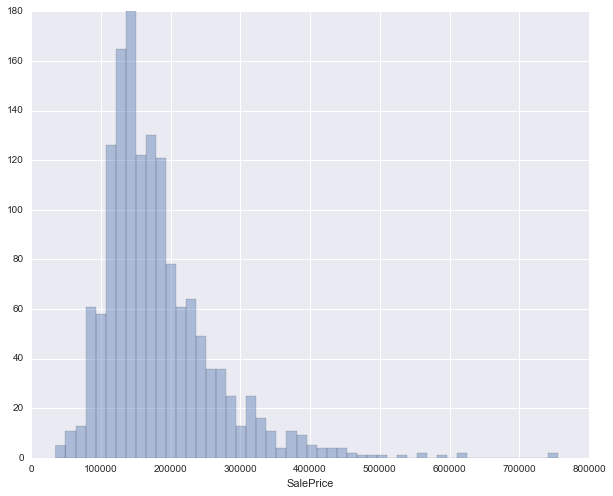

In [214]:
sns.set(rc={"figure.figsize": (8,6)})
sns.distplot(y,hist=True, kde=False, bins=50)

### We can see that the target variable is skewed, and there are outliers. For this reason, I will remove prices larger than 700000 and transform the data using numpy log1p.

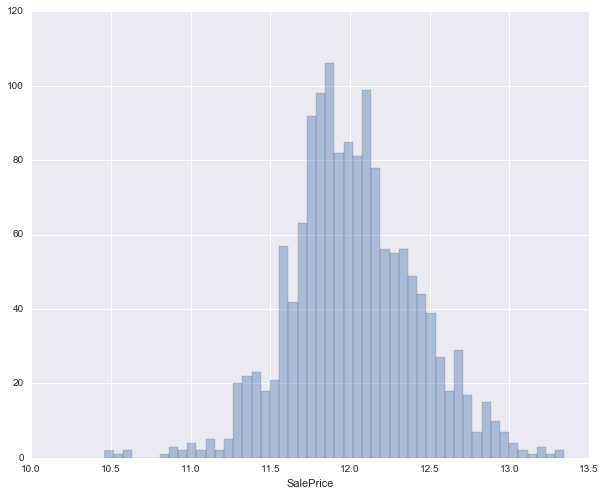

In [215]:
y = y[y <= 700000]
log1p_y = np.log1p(y)

sns.set(rc={"figure.figsize": (10, 8)})
sns.distplot(log1p_y,hist=True, kde=False, bins=50)

In [216]:
train = train.iloc[y.index,]
train.shape

(1458, 80)

# Visualize Continuous features (exclude the ID) 

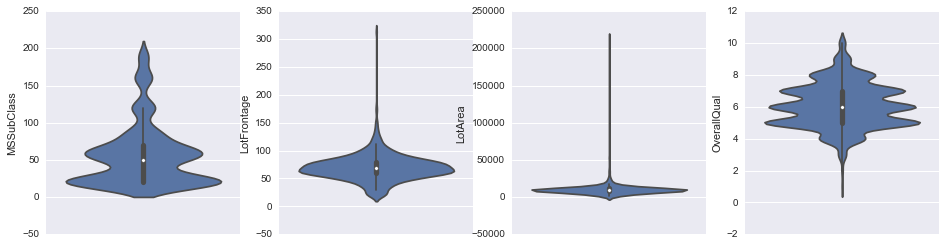

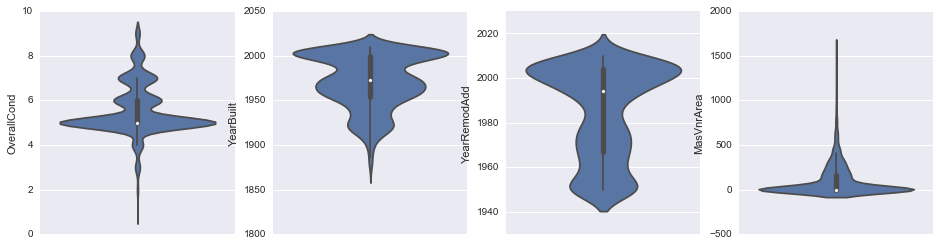

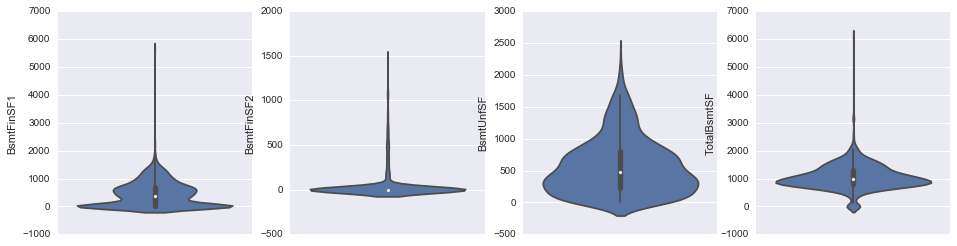

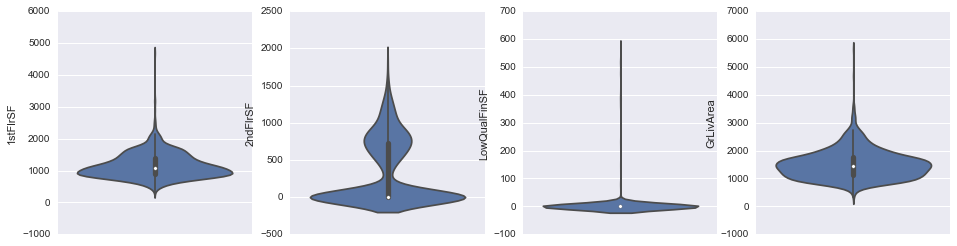

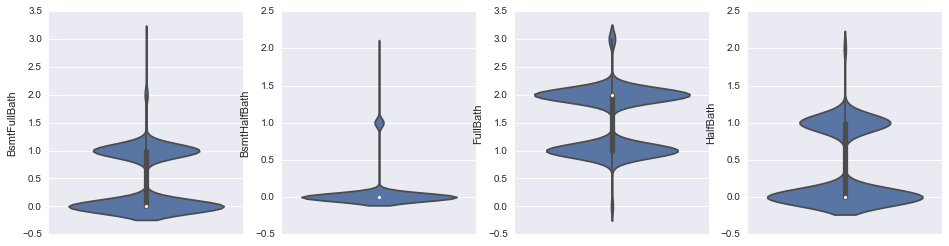

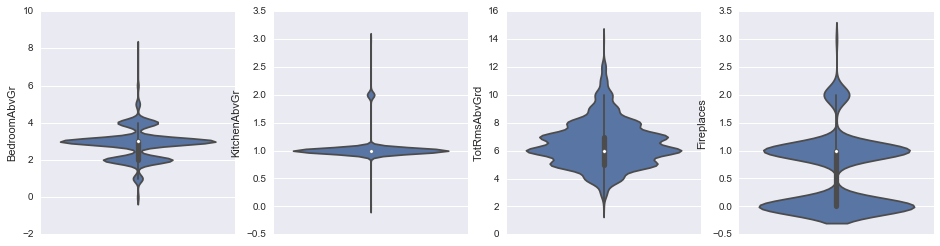

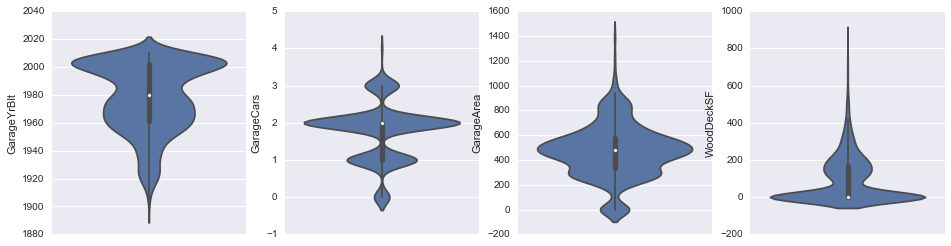

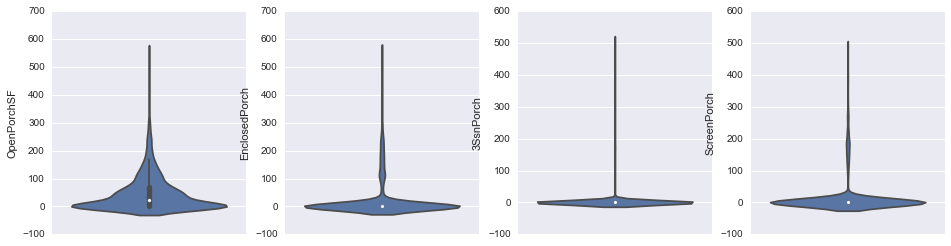

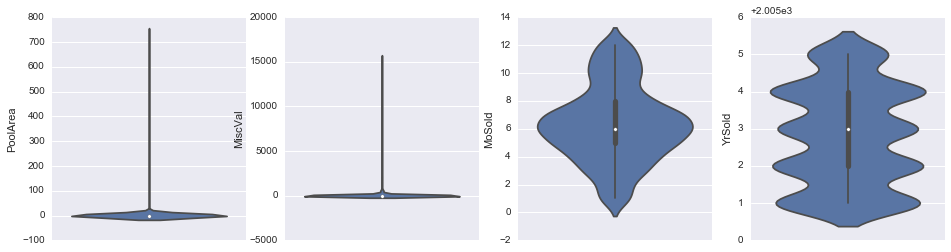

In [217]:
numeric_cols = []

for col, col_data in train.iteritems():
    if col_data.dtype != object and col!='Id':
        numeric_cols.append(col)
        
n_cols = 4
n_rows = 9
idx = 0
for i in range(n_rows):
    fg, ax = plt.subplots(nrows=1, ncols = n_cols, figsize=(16,4))
    for j in range(n_cols):
        sns.violinplot(y=train[numeric_cols[idx]], ax=ax[j])
        idx += 1
        if idx >= 36:
            break

**Highly skewed features: **
    - LotArea
    - BasmtFinSF2
    - LowQualFinSF
    - BsmtHalfBath
    - EnclosedPorch
    - 3SsnPorch
    - ScreenPorch
    - PoolArea
    - MiscVal

# Visualize Categorical features

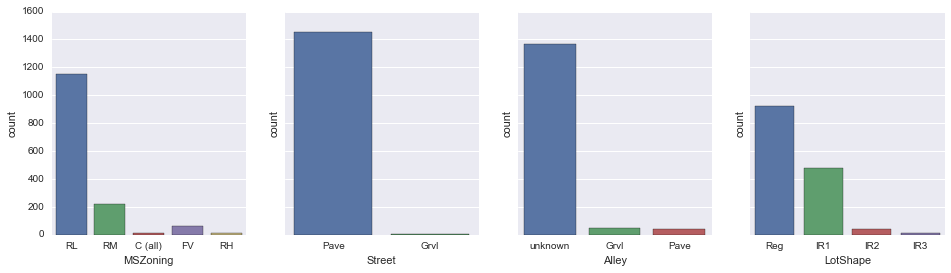

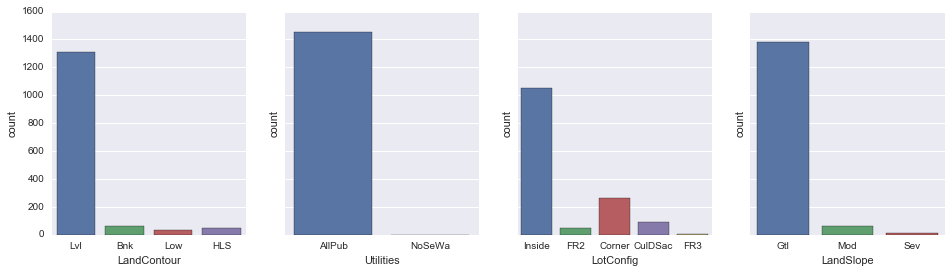

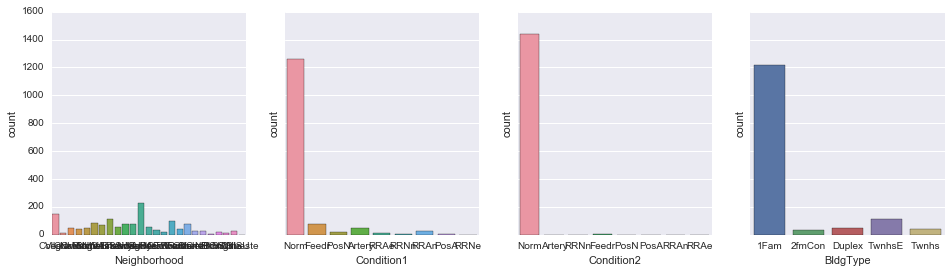

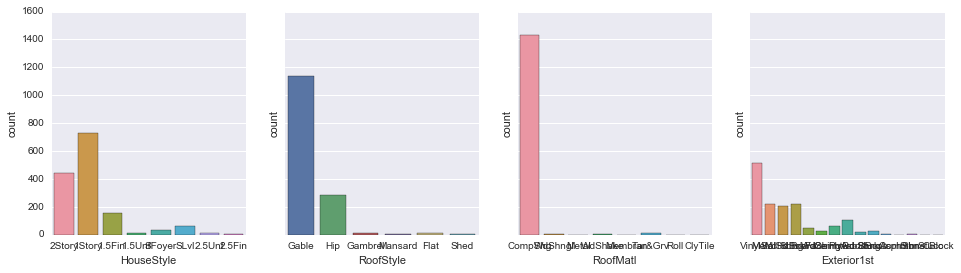

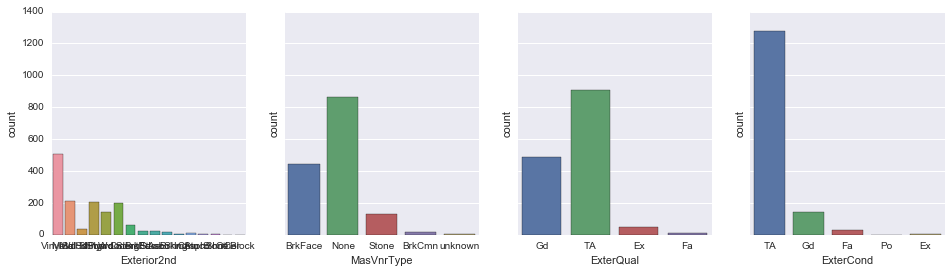

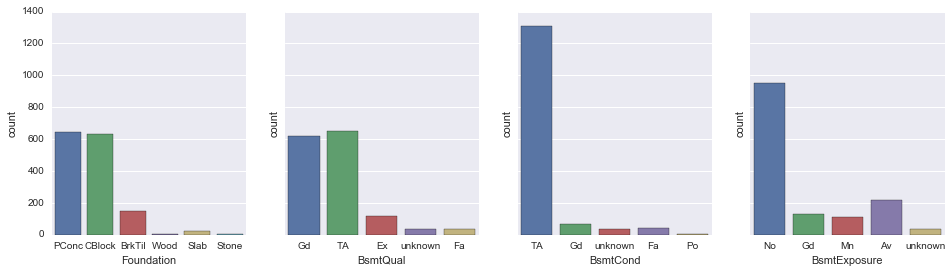

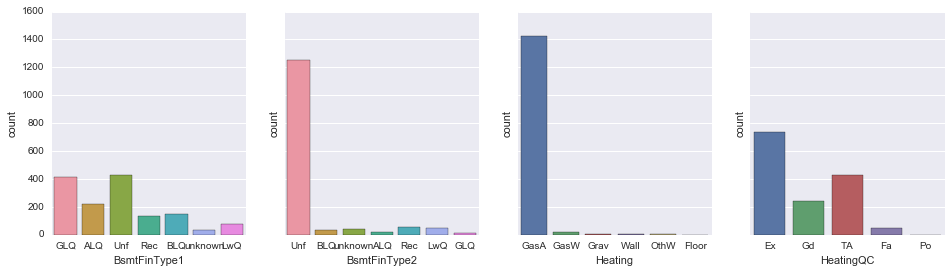

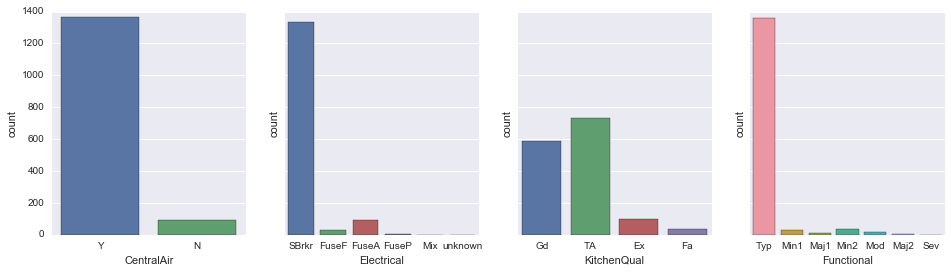

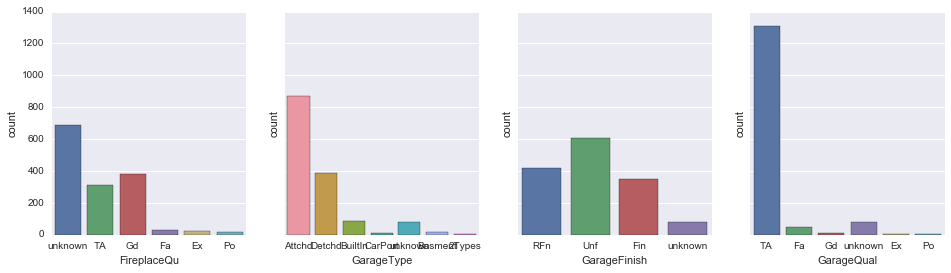

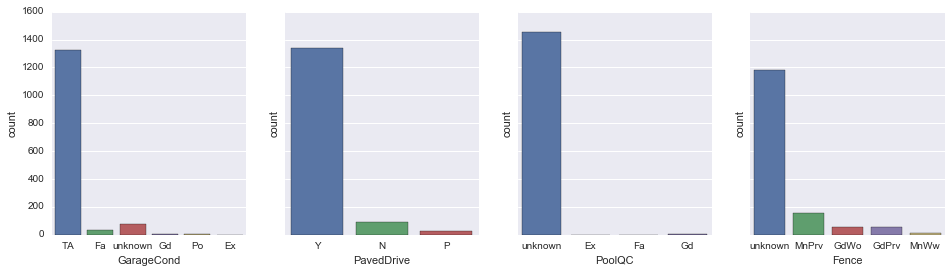

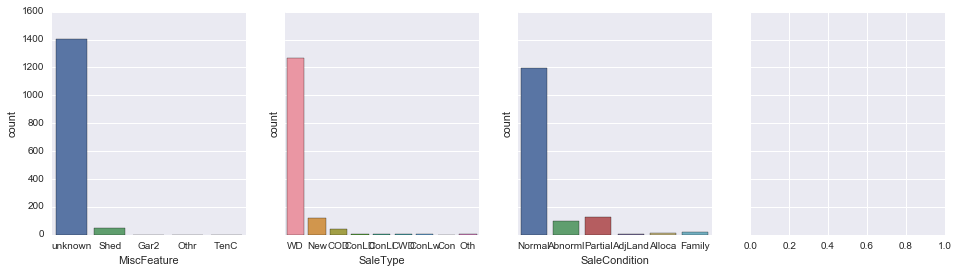

In [218]:
n_cols = 4
n_rows = 11
idx = 0
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(16, 4))
    for j in range(n_cols):
        sns.countplot(x=train[categorical_cols[idx]], ax=ax[j])
        idx += 1
        if idx >= 43:
            break

In [286]:
data['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

## Scatter plot of target and predict continuous variables

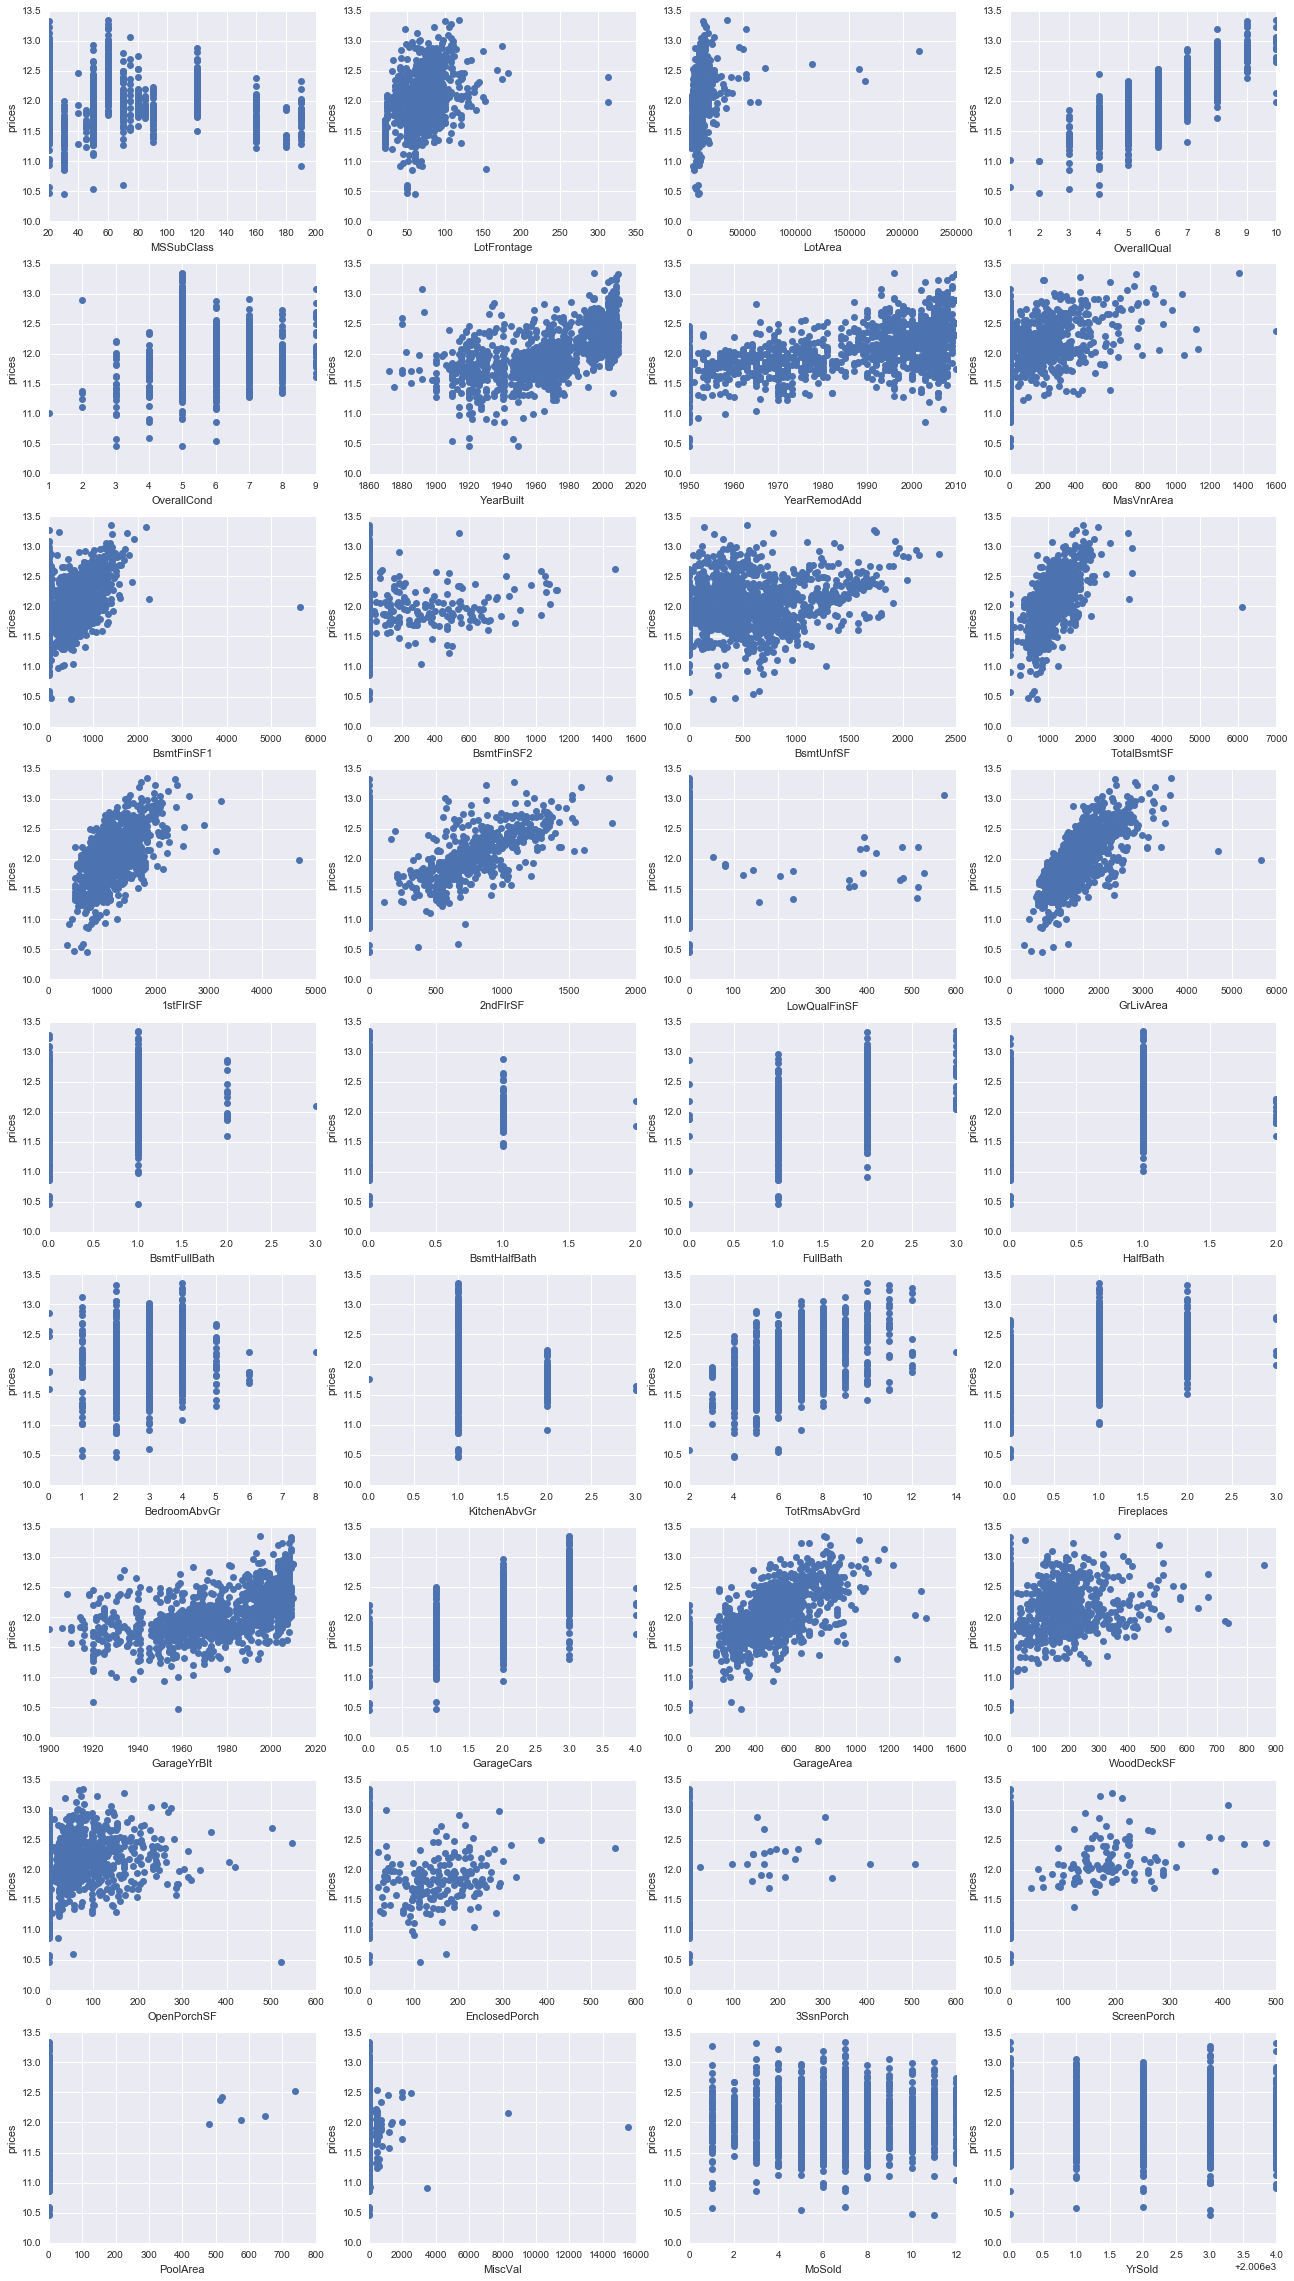

In [219]:
fig = plt.figure(figsize=(22, 40))

for i, col in enumerate(numeric_cols):
    if col != 'SalePrice':
        plt.subplot(9, 4, i + 1)  

        plt.plot(train[col], log1p_y, 'o')
        plt.xlabel(col)
        plt.ylabel('prices')

## Check the feature correlation more than 0.8 or less than -0.8

In [220]:
train_corr = train.iloc[:,1:-1].corr()
train_corr.shape[0]
for i in range(train_corr.shape[0]-1, 0, -1):
    for j in range(0, train_corr.shape[0]):
        if i < j and (train_corr.iloc[i,j] >= 0.8  or train_corr.iloc[i,j] <= -0.8):
            print "The correlation between {} and {} is {}".format(train.columns[i], \
                                train.columns[j], round(train_corr.iloc[i,j],2))        

The correlation between MasVnrType and MasVnrArea is 0.88
The correlation between BldgType and RoofMatl is 0.83
The correlation between LandSlope and Neighborhood is 0.82
The correlation between Street and Exterior2nd is 0.83


## Convert Categorical variables to dummy variables - One Hot Encoding

In [223]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

dummy_train = []
dummy_test = []
labels = []
for idx, col in enumerate(categorical_cols):
    
    labels = list(set(train[col].unique()) | set(test[col].unique()))
    
    # label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    feature_train = label_encoder.transform(train[col])
    feature_train = feature_train.reshape(train.shape[0],1)
    
    feature_test = label_encoder.transform(test[col])
    feature_test = feature_test.reshape(test.shape[0],1)
    
    # one hot encode
    onehot_encoder = OneHotEncoder(sparse=False, n_values=len(labels))
    feature_train = onehot_encoder.fit_transform(feature_train)
    dummy_train.append(feature_train)
    
    feature_test = onehot_encoder.fit_transform(feature_test)
    dummy_test.append(feature_test)
    
# Make a 2D array from a list of 1D arrays
encode_train = np.column_stack(dummy_train)
encode_test = np.column_stack(dummy_test)

print(encode_train.shape)
print(encode_test.shape)

(1458L, 275L)
(1459L, 275L)


# Test Algorithms

In [249]:
from sklearn.metrics import mean_absolute_error  # I use this metrics because I don't want put more weight on big error
from sklearn.metrics import r2_score 

In [242]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# non linear regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# ensemble regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# other regressor
#from xgboost import XGBRegressor

In [232]:
X_train = encode_train
Y_train = log1p_y

print(X_train.shape)
print(Y_train.size)

(1458L, 275L)
1458


## 1. Linear Regressor

In [277]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, Y_train)

mae = mean_absolute_error(np.expm1(Y_train), np.expm1(model.predict(X_train)))
#r2_s = r2_score(np.expm1(Y_train), np.expm1(model.predict(X_train)))
print("The mae of {} is {}".format('LinearRegression', mae))
#print("The R^2 of {} is {}".format('LinearRegression', r2_s))

alpha_list = [0.1, 1.0, 10.0]

for alpha in alpha_list:
    
    # Ridge Regression
    
    rg = Ridge(alpha=alpha)
    rg.fit(X_train, Y_train)
    mae = mean_absolute_error(np.expm1(Y_train), np.expm1(rg.predict(X_train)))
    #r2_s = r2_score(np.expm1(Y_train), np.expm1(rg.predict(X_train)))
    print("The mae of {} is {} when alpha is {}".format('Ridge', mae, alpha))
    #print("The R^2 of {} is {} when alpha is {}".format('Ridge', r2_s, alpha))

    # LASSO
    ls = Lasso(alpha=alpha)
    ls.fit(X_train, Y_train)
    mae = mean_absolute_error(np.expm1(Y_train), np.expm1(ls.predict(X_train)))
    #r2_s = r2_score(np.expm1(Y_train), np.expm1(ls.predict(X_train)))
    print("The mae of {} is {} when alpha is {}".format('LASSO', mae, alpha))
    #print("The R^2 of {} is {} when alpha is {}".format('LASSO', r2_s, alpha))

    # ElasticNet
    en = ElasticNet(alpha=alpha)
    en.fit(X_train, Y_train)
    mae = mean_absolute_error(np.expm1(Y_train), np.expm1(en.predict(X_train)))
    #r2_s = r2_score(np.expm1(Y_train), np.expm1(en.predict(X_train)))
    print("The mae of {} is {} when alpha is {}".format('ElasticNet', mae, alpha))
    #print("The R^2 of {} is {} when alpha is {}".format('ElasticNet', r2_s, alpha))

The mae of LinearRegression is 19046.5795463
The mae of Ridge is 19032.1510406 when alpha is 0.1
The mae of LASSO is 52008.2964843 when alpha is 0.1
The mae of ElasticNet is 40206.9369374 when alpha is 0.1
The mae of Ridge is 19371.3572095 when alpha is 1.0
The mae of LASSO is 54877.9254232 when alpha is 1.0
The mae of ElasticNet is 54877.9254232 when alpha is 1.0
The mae of Ridge is 20081.5455677 when alpha is 10.0
The mae of LASSO is 54877.9254232 when alpha is 10.0
The mae of ElasticNet is 54877.9254232 when alpha is 10.0


## 2. None Linear Regressor

In [278]:
# KNN

neighbor_list = range(2, 6)
for n in neighbor_list:
    knnr = KNeighborsRegressor(n_neighbors=n)
    knnr.fit(X_train, Y_train)

    mae = mean_absolute_error(np.expm1(Y_train), np.expm1(knnr.predict(X_train)))
    #r2_s = r2_score(np.expm1(Y_train), np.expm1(knnr.predict(X_train)))
    print(("The mae of {} is {} when n_neighbors is {}".format('KNNRegressor', mae, n)))
    #print(("The R^2 of {} is {} when n_neighbors is {}".format('KNNRegressor', r2_s, n)))

The mae of KNNRegressor is 15863.7000081 when n_neighbors is 2
The mae of KNNRegressor is 18862.7148669 when n_neighbors is 3
The mae of KNNRegressor is 20442.6638945 when n_neighbors is 4
The mae of KNNRegressor is 21252.2862512 when n_neighbors is 5


In [281]:
# SVM

c_list = [0.1, 1.0, 10, 100.0]
for c_value in c_list:
    svr = SVR(C=c_value)
    svr.fit(X_train, Y_train)

    mae = mean_absolute_error(np.expm1(Y_train), np.expm1(svr.predict(X_train)))
    #r2_s = r2_score(np.expm1(Y_train), np.expm1(svr.predict(X_train)))
    print(("The mae of {} is {} when C is {}".format('SVM', mae, c_value)))
    #print(("The R^2 of {} is {} when C is {}".format('CART', r2_s, c_value)))

The mae of SVM is 28220.4845667 when C is 0.1
The mae of SVM is 21159.3928861 when C is 1.0
The mae of SVM is 17116.4145772 when C is 10
The mae of SVM is 13872.6701933 when C is 100.0


In [282]:
# CART

max_depth_list = range(5, 11)
for depth in max_depth_list:
    dtr = DecisionTreeRegressor(max_depth = depth)
    dtr.fit(X_train, Y_train)

    mae = mean_absolute_error(np.expm1(Y_train), np.expm1(dtr.predict(X_train)))
    #r2_s = r2_score(np.expm1(Y_train), np.expm1(dtr.predict(X_train)))
    print(("The mae of {} is {} when max depth is {}".format('CART', mae, depth)))
    #print(("The R^2 of {} is {} when max_depth is {}".format('CART', r2_s, depth)))

The mae of CART is 27924.9711254 when max depth is 5
The mae of CART is 24657.1294635 when max depth is 6
The mae of CART is 21542.795748 when max depth is 7
The mae of CART is 18775.628981 when max depth is 8
The mae of CART is 15985.2227367 when max depth is 9
The mae of CART is 13401.8328927 when max depth is 10


## 3. Essemble Regressor

In [271]:
# Bagging Regressor
model = BaggingRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(np.expm1(Y_train), np.expm1(model.predict(X_train)))
print(mae)

# Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(np.expm1(Y_train), np.expm1(model.predict(X_train)))
print(mae)

# ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(np.expm1(Y_train), np.expm1(model.predict(X_train)))
print(mae)

# AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(np.expm1(Y_train), np.expm1(model.predict(X_train)))
print(mae)

# GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

mae = mean_absolute_error(np.expm1(Y_train), np.expm1(model.predict(X_train)))
print(mae)

10341.937482
10001.9859582
163.132633272
29064.4241197
19477.0812593


## 4. Other Regressor

In [237]:
model = ElasticNet()
model.fit(X_train, Y_train)

mae = mean_absolute_error(np.expm1(Y_train), np.expm1(model.predict(X_train)))
mae

54877.925423235174

# Visualizing regression

In [ ]:
# visualizing regression
fig=plt.figure()

plt.scatter(X_train, Y_Train, color='blue', label="training")
plt.plot(X_train, reg.predict(X_train), color = 'blue',linewidth=2,  alpha=0.5)


plt.title("Predictions of House Price", fontsize=20)
plt.xlabel("Ages", fontsize=14)
plt.ylabel("Net worths", fontsize=14)
plt.legend(loc='upper left')
plt.show()  

In [49]:
from collections import Counter

for col, col_data in train.iteritems():
    if col_data.dtype == object:
        cnt = Counter(col_data)
        print col + ':' , cnt
print '\n' 
print 'Numerical variables with missing values:'
for col, col_data in train.iteritems():
    if col_data.dtype != object and any(col_data.isnull()):

        print col + ':' , any(col_data.isnull())

MSZoning: Counter({'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10})
Street: Counter({'Pave': 1454, 'Grvl': 6})
Alley: Counter({nan: 1369, 'Grvl': 50, 'Pave': 41})
LotShape: Counter({'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10})
LandContour: Counter({'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36})
Utilities: Counter({'AllPub': 1459, 'NoSeWa': 1})
LotConfig: Counter({'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4})
LandSlope: Counter({'Gtl': 1382, 'Mod': 65, 'Sev': 13})
Neighborhood: Counter({'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'SWISU': 25, 'StoneBr': 25, 'Blmngtn': 17, 'MeadowV': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2})
Condition1: Counter({'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 

```python
train.groupby('Street').agg({'SalePrice':[np.mean, np.size]})
train.groupby('MiscFeature').agg({'SalePrice':{'Size': np.size,'Mean': np.mean}})
```
- Street
- Alley
- Utilities
- PoolQC
- MiscFeature